Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.
---

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('/content/cars_sampled.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [81]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00


Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.
---

In [82]:
df.shape

(50001, 19)

In [83]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

Поработайте с типами переменных. Все числовые значения переведите в формат int.
---
They already have right types

In [84]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [85]:
for col in df.columns:
  print('\n',col)
  print(df[col].unique()[:5])
  print(df[col].dtypes)


 dateCrawled
['2016-03-30T13:51:00.000000000' '2016-07-03T09:54:00.000000000'
 '2016-01-04T00:57:00.000000000' '2016-03-19T17:50:00.000000000'
 '2016-03-16T14:51:00.000000000']
datetime64[ns]

 name
['Zu_verkaufen' 'Volvo_XC90_2.4D_Summum' 'Volkswagen_Touran'
 'Seat_Ibiza_1.4_16V_Reference'
 'Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_Sitzhzg.']
object

 seller
['private' 'commercial']
object

 offerType
['offer' 'request']
object

 price
[ 4450 13299  3200  4500 18750]
int64

 abtest
['test' 'control']
object

 vehicleType
['limousine' 'suv' 'bus' 'small car' 'station wagon']
object

 yearOfRegistration
[2003 2005 2006 2008 1995]
int64

 gearbox
['manual' 'automatic' nan]
object

 powerPS
[150 163 101  86 185]
int64

 model
['3er' 'xc_reihe' 'touran' 'ibiza' 'passat']
object

 kilometer
[150000  60000 125000   5000  50000]
int64

 monthOfRegistration
[ 3  6 11 12  2]
int64

 fuelType
['diesel' 'petrol' nan 'cng' 'lpg']
object

 brand
['bmw' 'volvo' 'volkswagen' 'seat' 'opel']
objec

Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.
---

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

Price column preprocessing

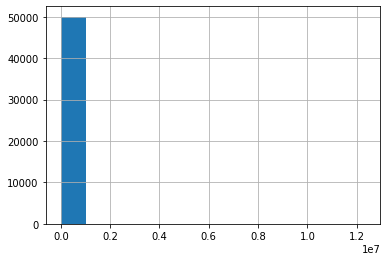

In [87]:
df.price.hist(bins=12)

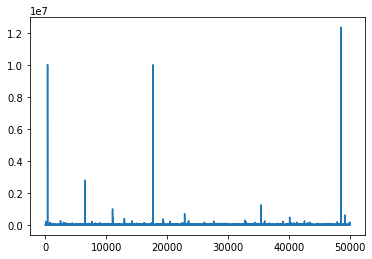

In [88]:
df.price.plot()

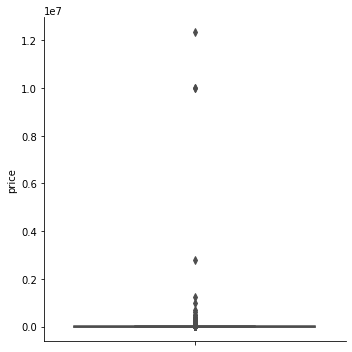

In [89]:
sns.catplot(
    y='price', 
    data=df,
    palette='bright',
    kind = 'box'
)

In [90]:
df = df[df.price < df.price.quantile(0.97)]

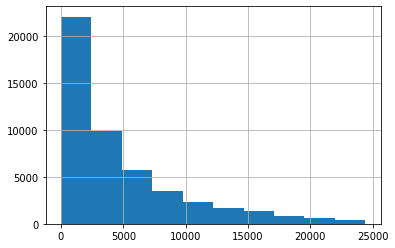

In [91]:
df.price.hist()

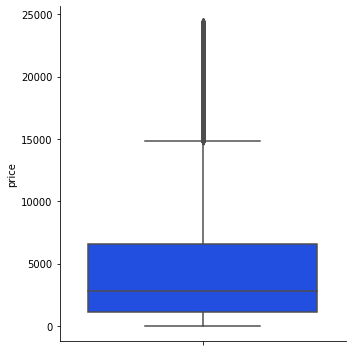

In [92]:
sns.catplot(
    y='price', 
    data=df,
    palette='bright',
    kind = 'box'
)

In [93]:
df.price.replace(0, df.price.mean(), inplace=True)
# None
df.price

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0         4450.000000
1        13299.000000
2         3200.000000
3         4500.000000
4        18750.000000
             ...     
49996     4709.220371
49997    19999.000000
49998     4709.220371
49999      100.000000
50000     1100.000000
Name: price, Length: 48500, dtype: float64

In [94]:
import numpy as np


from sklearn import preprocessing
x_array = np.array(df['price'])
normalized_arr = preprocessing.normalize([x_array])

normalized_arr = normalized_arr[0]

(array([20622., 11389.,  5744.,  3486.,  2401.,  1702.,  1344.,   802.,
          568.,   442.]),
 array([6.55881397e-07, 1.60087531e-03, 3.20109475e-03, 4.80131418e-03,
        6.40153361e-03, 8.00175304e-03, 9.60197248e-03, 1.12021919e-02,
        1.28024113e-02, 1.44026308e-02, 1.60028502e-02]),
 <a list of 10 Patch objects>)

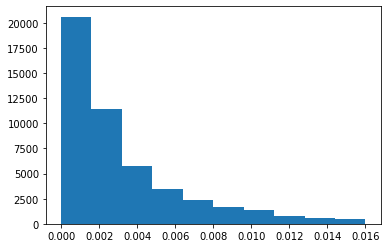

In [95]:
plt.hist(normalized_arr)

In [96]:
df.price_fixed

AttributeError: ignored

Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.
---

In [ ]:
# sns.heatmap(df.corr(), annot=True)

df.corr()

Parameters: kilometer, powerPS, YearOfRegistration, Postalcode, MonthOfRegistrtion

In [ ]:
cols = ['kilometer', 'powerPS', 'yearOfRegistration', 'postalCode', 'monthOfRegistration']

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (12,20))
for i in range(len(cols)):
  ax[i, 0].hist(df[cols[i]])
  ax[i, 0].set_title('hist of ' + cols[i])
  
  ax[i, 1].boxplot(df[cols[i]])
  ax[i, 1].set_title('boxplot of ' + cols[i])

Kilometer preprocessing
---

In [ ]:
df[df.kilometer == 150_000]['kilometer'].count()

Many huge values means that it`s the limit of kilometers passed by auto, we no need to fix this

In [ ]:
df.kilometer.isna().sum()

In [ ]:
df[df.kilometer == 0]

There is no miss values and zeros

PowerPS column preproccessing
---

In [ ]:
df.powerPS.mean(), df.powerPS.max()

In [ ]:
df[df.powerPS == 0]['powerPS'].count()

We had the same problem with price, so let`s fix this like we fixed price

In [ ]:
df = df[df.powerPS < df.powerPS.quantile(0.95)]

In [97]:
df.powerPS.replace(0, df.powerPS.mean(), inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [98]:
# df.powerPS = boxcox(df.powerPS, 1)

import numpy as np


from sklearn import preprocessing
x_array = np.array(df.powerPS)
normalized_arr = preprocessing.normalize([x_array])

normalized_arr = normalized_arr[0]

(array([4.8482e+04, 8.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.77860093e-05, 3.43643486e-02, 6.87109112e-02, 1.03057474e-01,
        1.37404036e-01, 1.71750599e-01, 2.06097162e-01, 2.40443724e-01,
        2.74790287e-01, 3.09136849e-01, 3.43483412e-01]),
 <a list of 10 Patch objects>)

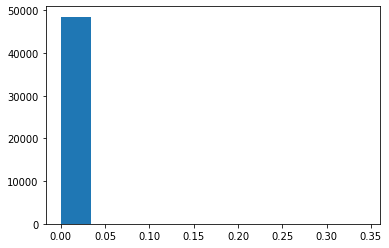

In [99]:
plt.hist(normalized_arr)

Year of Registration column preproccessing
---

In [100]:
df.yearOfRegistration.mean(), df.yearOfRegistration.max()

(2005.0605360824743, 9999)

Outlier years

In [101]:
df.yearOfRegistration.sort_values(ascending =False)

6866     9999
43864    9999
40368    9999
47770    9999
18067    9999
         ... 
25449    1000
12768    1000
7150     1000
43043    1000
8027     1000
Name: yearOfRegistration, Length: 48500, dtype: int64

Let`s change all years that does not included in [1900, 2022] interval change for less mean integer by this column

In [102]:
import math
df[(df.yearOfRegistration < 1900) | (df.yearOfRegistration > 2022)]['yearOfRegistration'].count()

30

In case few numbers of outliers we can easily drop it from dataframe

In [103]:
df.drop(df[(df.yearOfRegistration < 1900) | (df.yearOfRegistration > 2022)].index,
           inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


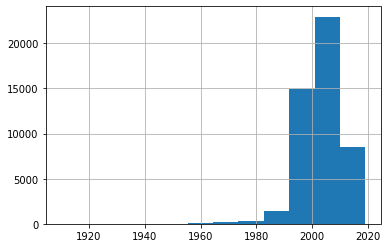

In [104]:
df.yearOfRegistration.hist(bins = 12)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4205c49f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4205c492d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4205be4550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4205c2f550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4205c2f090>],
 'means': []}

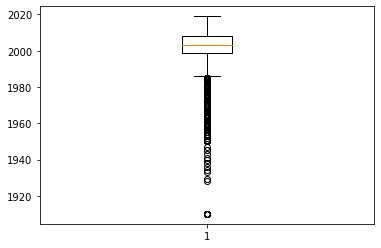

In [105]:
plt.boxplot(df.yearOfRegistration)


Postalcode column doesn`t need preproccessing
---

Month of Registration column preproccessing
---

In [106]:
df.monthOfRegistration.mean(), df.monthOfRegistration.max(), df.monthOfRegistration.min()

(5.735609655456984, 12, 0)

In [107]:
df[df.monthOfRegistration == 0]['monthOfRegistration'].count()

4991

It can be possible that car registred with 0 month, so we can`t process this values

Now we processed all numeric columns
---

Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?
---

In [108]:
cols = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

Text(0.5, 1.0, 'Boxplot price with Vehicle type')

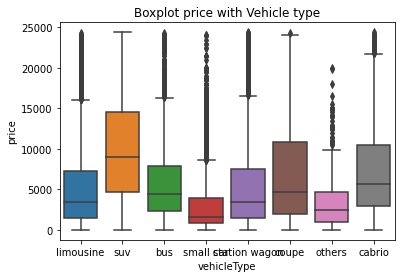

In [109]:
ax = sns.boxplot(data=df, y="price", x="vehicleType")
ax.set_title('Boxplot price with Vehicle type')


Text(0.5, 1.0, 'Boxplot price with gearbox')

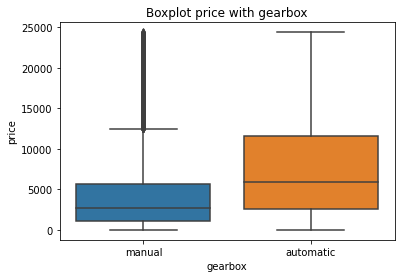

In [110]:
ax = sns.boxplot(data=df, y="price", x="gearbox")
ax.set_title('Boxplot price with gearbox')


Text(0.5, 1.0, 'Boxplot price with fuelType')

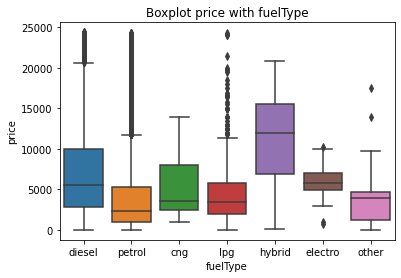

In [111]:
ax = sns.boxplot(data=df, y="price", x="fuelType")
ax.set_title('Boxplot price with fuelType')


Text(0.5, 1.0, 'Boxplot price with notRepairedDamage')

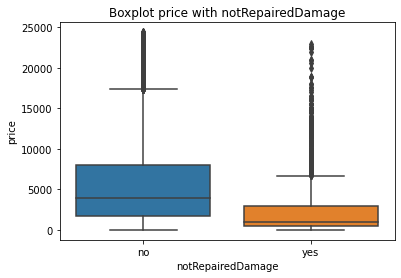

In [112]:
ax = sns.boxplot(data=df, y="price", x="notRepairedDamage")
ax.set_title('Boxplot price with notRepairedDamage')


Few numbers of categorical features isn`t helpful, but we have particulary normal size of dataset, that is why we do not have to drop this features
-
Results of analysis will not be biased

Ничего отбрасывать не будем

Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.
---

In [113]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5133
yearOfRegistration        0
gearbox                2756
powerPS                   0
model                  2667
kilometer                 0
monthOfRegistration       0
fuelType               4431
brand                     0
notRepairedDamage      9627
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

Let`s drop notRepairedDamage, vehicleType and fueltype columns

In [114]:
df.drop(labels = ['vehicleType', 'fuelType', 'notRepairedDamage'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'brand', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

Now we fill none values in gearbox and model columns

In [116]:
df.gearbox.unique(), df.gearbox.mode().values[0]

(array(['manual', 'automatic', nan], dtype=object), 'manual')

In [117]:
df.gearbox.fillna(df.gearbox.mode().values[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [118]:
df.gearbox.isna().sum()

0

In [119]:
df.model.isna().sum()

2667

In [120]:
import numpy as np
while df.model.isna().sum() != 0:
  #creates a random permuation of the categorical values
  permutation = np.random.permutation(df.model)

  #erase the empty values
  empty_is = np.where(permutation == "")
  permutation = np.delete(permutation, empty_is)

  #replace all empty values of the dataframe[field]
  end = len(permutation)
  df.model = df.model.apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [121]:
df.model.isna().sum()

0

Сохраните полученный датасет и выведете его.
---

In [122]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450.0,test,2003,manual,150.0,3er,150000,3,bmw,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299.0,control,2005,manual,163.0,xc_reihe,150000,6,volvo,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200.0,test,2003,manual,101.0,touran,150000,11,volkswagen,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500.0,control,2006,manual,86.0,ibiza,60000,12,seat,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750.0,test,2008,automatic,185.0,xc_reihe,150000,11,volvo,2016-03-16,55270,2016-01-04 23:18:00


In [74]:
# df = df.drop(labels=['dateCreated', 'lastSeen', 'offerType', 'seller', 'dateCrawled', 'dateCreated', 'postalCode',  'monthOfRegistration', 'yearOfRegistration'], axis = 1)

In [123]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,48470.000000,48470.000000,48470.000000,48470.000000,48470.000000,48470.000000
mean,4850.085485,2003.178812,125.118915,127576.026408,5.735610,50548.833175
std,4940.556535,7.585416,222.561039,38455.866204,3.720309,25708.813391
min,1.000000,1910.000000,1.000000,5000.000000,0.000000,1067.000000
25%,1250.000000,1999.000000,86.000000,125000.000000,3.000000,30419.000000
50%,3000.000000,2003.000000,112.305443,150000.000000,6.000000,49342.000000
75%,6600.000000,2008.000000,143.000000,150000.000000,9.000000,71083.000000
max,24399.000000,2019.000000,19312.000000,150000.000000,12.000000,99998.000000


Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением разных методов заполнения пропущенных значений. Сделайте вывод об эффективности разных методов.
---

In [76]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 637 kB/s 


In [124]:
from category_encoders.ordinal import OrdinalEncoder 
df = OrdinalEncoder().fit_transform(df)

In [132]:
df.head()
df = df.drop(labels=['dateCreated', 'lastSeen', 'seller', 'dateCrawled', 'postalCode',  'monthOfRegistration', 'yearOfRegistration'], axis = 1)


KeyError: ignored

In [160]:
df
df = df[['price', 'powerPS', 'kilometer']]

In [161]:
y = df.price
X = df.drop(labels=['price'], axis = 1)
y

0         4450.000000
1        13299.000000
2         3200.000000
3         4500.000000
4        18750.000000
             ...     
49996     4709.220371
49997    19999.000000
49998     4709.220371
49999      100.000000
50000     1100.000000
Name: price, Length: 48470, dtype: float64

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [165]:
y_pred = clf.predict(X_test)
y_pred

array([ 3667.51089695, 10252.06441692,  3787.03799112, ...,
        5122.46351984,  3857.00507064,  3944.46392004])

In [166]:
print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))

MSE:  21133376.85


In [167]:
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))

Determnitation coefficient:  0.14


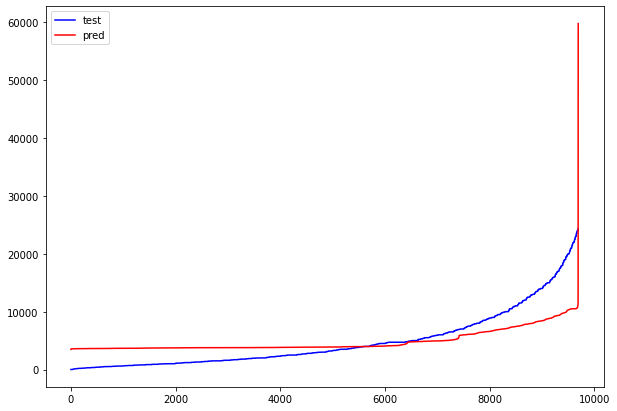

In [168]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])


In [209]:
df = pd.read_csv('/content/cars_sampled.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
#  
# None


In [210]:
df = df[['price', 'powerPS', 'kilometer']]
df

,price,powerPS,kilometer
0,4450,150,150000
1,13299,163,150000
2,3200,101,150000
3,4500,86,60000
4,18750,185,150000
...,...,...,...
49996,0,0,150000
49997,19999,0,5000
49998,0,0,150000
49999,100,0,150000


In [205]:
from random import randint

In [213]:
df.price.replace(0, randint(1, 1000), inplace=True)
df
df.powerPS.replace(0, randint(1, 1000), inplace=True)


In [183]:
# df['power1'] = df[df.powerPS != 0]['powerPS'].mode()
# df['power1'] = df[df.powerPS == 'Nan']['powerPS'].mode()

In [214]:
y = df.price
y
X = df.drop(labels=['price'], axis = 1)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('MSE: ', round(mean_squared_error(y_test, y_pred), 2))
print('Determnitation coefficient: ', round(r2_score(y_test, y_pred), 2))

MSE:  189018109.15
Determnitation coefficient:  0.07


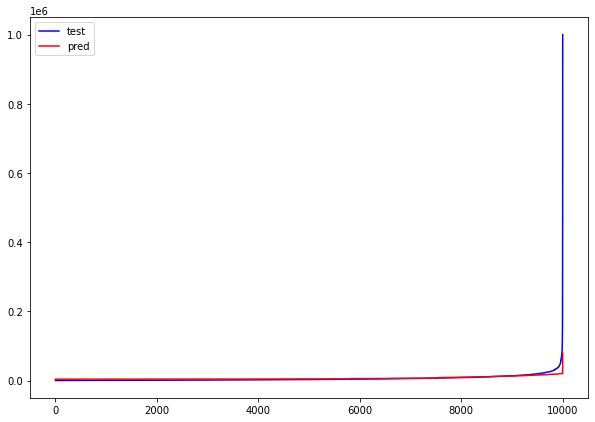

In [217]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])